# CS5785, Homework 0
Prepared by Zen Yui (jzy6) and Will Davis (twd38)

In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
# import plotly.plotly as py
# import plotly.graph_objs as go

In [2]:
# plotting matplitlib inline
# %matplotlib inline

In [3]:
# using the preset "ggplot" styling for matplotlib
# plt.style.use('ggplot')

**According to the supplied "iris.names" file, the following dataset attributes are available:**
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica

In [4]:
# setting column names and units for use later
columns = ['sepal_length','sepal_width','petal_length','petal_width','label']
feature_columns = columns[:4]
# feature_units = ['cm','cm','cm','cm']

In [5]:
# using pandas, read the comma separated data and assign column names
dataset = pd.read_csv('data/iris.data', names=columns)

In [6]:
# separate features into a matrix and labels into vector
features = dataset[feature_columns]
labels = dataset['label']

In [7]:
# for reference, display 5 observations
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# there are 150 observations, each containing 4 features each
features.shape

(150, 4)

In [9]:
# data is equally distributed among the three labels/classes (50 each)
labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [133]:
# assign red, blue, green colors to the setosa, virginica, and versicolor labels respectively
colors = labels.astype(str).str.lower().map({
    'iris-setosa': 'purple', # grey
    'iris-virginica': 'orange',
    'iris-versicolor': 'blue' # #2F4F4F
})

In [134]:
def un_snake(value):
    '''convert snake_case to proper case value'''
    return value.replace('_', ' ').title()

In [135]:
# get combinations of columns
combos = sorted(list(combinations(feature_columns, 2)))

In [138]:
# for each unique combination of features, create a scatterplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))

# convert axes to single array
axes = [ax for row in axes for ax in row]

for ix, (x,y) in enumerate(combos):
    x_vector = features[x]
    y_vector = features[y]

    x_label = un_snake(x)
    y_label = un_snake(y)

    title = '{} vs {}'.format(x_label, y_label)
    
    ax = axes[ix]
    ax.scatter(x_vector, y_vector, c=colors, alpha=0.4, s=150)
    
    ax.set_title(title, fontname='arial', fontweight='bold', fontsize=14)
    label_format = {'family':'sans-serif', 'color':'#708090', 'weight':'bold', 'size': 12}
    ax.set_xlabel(x_label + ' (cm)', fontdict=label_format)
    ax.set_ylabel(y_label + ' (cm)', fontdict=label_format)
    ax.grid(which='major', axis='both')
    
fig.suptitle(
    'Scatter Plots for Iris Dataset Features\n(purple=iris-setosa, orange=iris-versicolor, blue=iris-virginica)',
    fontsize=18,
    fontweight='bold'
)
# fig.tight_layout()
fig.subplots_adjust(top=.92)

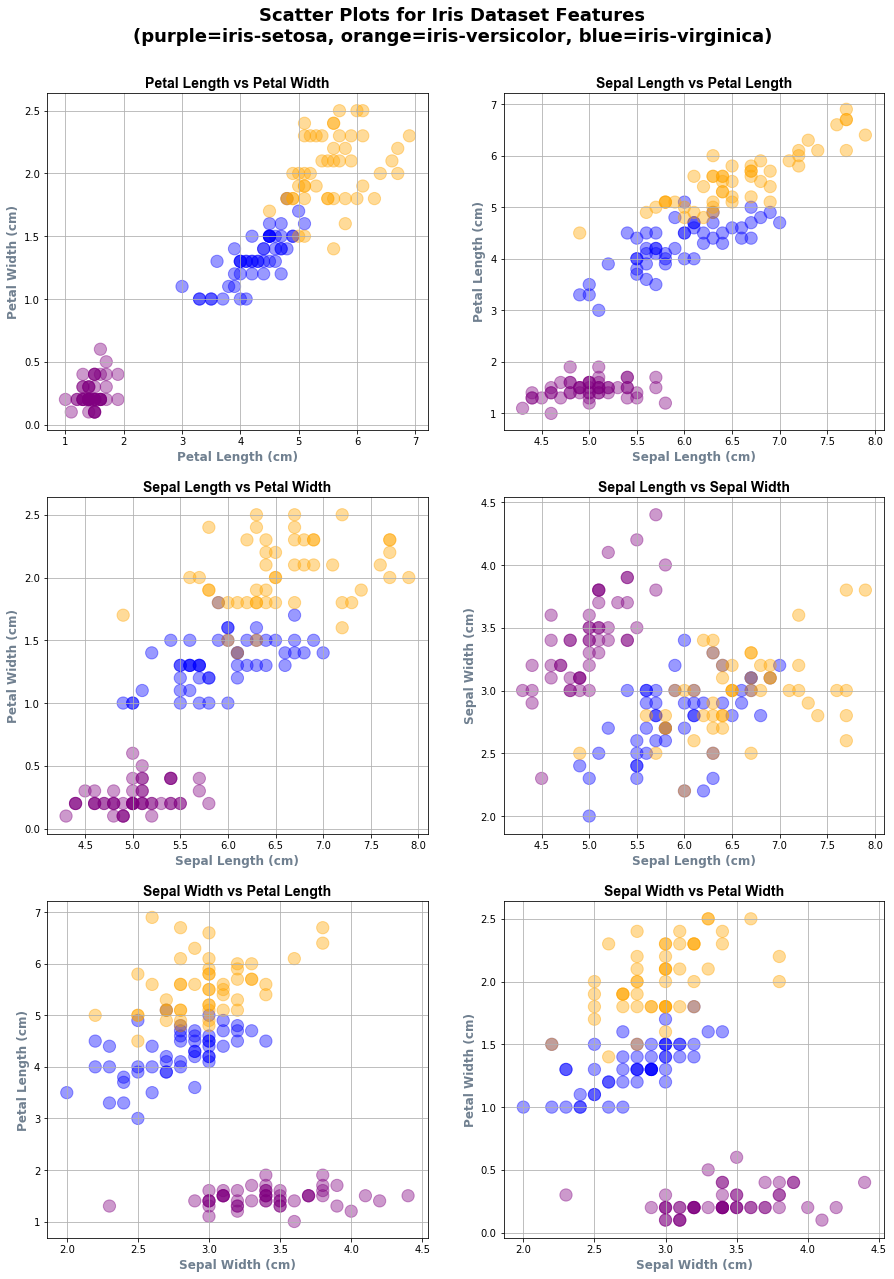

In [139]:
plt.show()